# [HW2] Merge Sort 

## 流程圖(打完 code 才畫的)
![](https://i.imgur.com/Craiz4M.png)

---
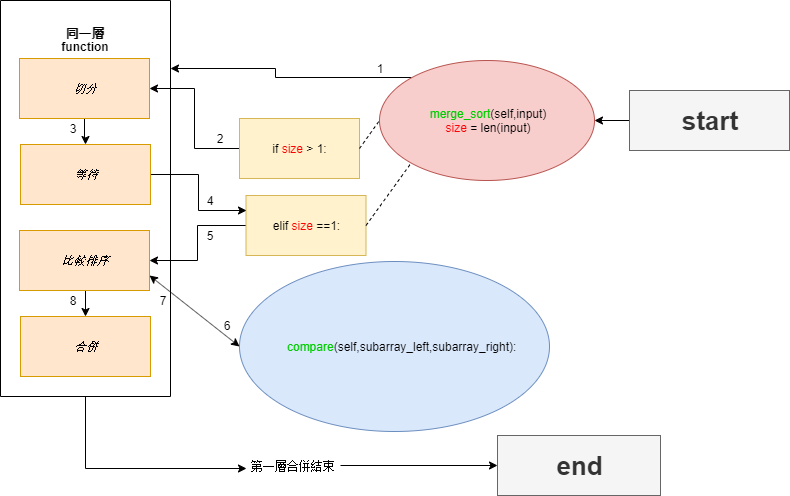

## 學習歷程
- 參考網站
    - [Merge Sort | GeeksforGeeks](https://www.geeksforgeeks.org/merge-sort/)
    - [Merge Sort | Studytonight](https://www.studytonight.com/data-structures/merge-sort)
    - [Merge Sort | Hackerearth](https://www.hackerearth.com/zh/practice/algorithms/sorting/merge-sort/tutorial/)
- 影片
    - [Merge sort in 3 minutes](https://www.youtube.com/watch?v=4VqmGXwpLqc)
    - [Merge Sort | GeeksforGeeks](https://www.youtube.com/watch?v=JSceec-wEyw)
    - [Merge Sort step by step walkthrough (Recursion)](https://www.youtube.com/watch?v=7LN9z140U90)
    

Try
---
在看完了 [GeeksforGeeks 的 Merge Sort 影片](https://www.youtube.com/watch?v=JSceec-wEyw) 後，我參考 [Hackerearth](https://www.hackerearth.com/zh/practice/algorithms/sorting/merge-sort/tutorial/) 的步驟和流程圖打算自己先試試看。

- 大致分成三個步驟：
    - **step1**: 切分，將未排序的 array 劃分為 sub array，當每個 sub array 就是每個 element 時。
    
    - **step2**: 比較合併，將相鄰的兩個 sub array ，互相比較第一個 element ，並取較小值則為以排序值，以排序值可以用新 array 存或是用 index 的方式將其隔開。
    
    - **step3**: 重複該過程，直到所有 sub array 都合併成一個 array 。

In [1]:
def cut():
    '''cut array'''
    return 

def conbine():
    '''conbine array'''
    return

但正要開始寫時，我發現不對，雖然在思考的時候可以理所當然的分成 切分和合併兩部分。但是在時做時卻不一樣。因為 **Merge Sort** 是建立在 [**遞迴演算法(Recursive algorithm**)](https://www.geeksforgeeks.org/recursion/) 的架構下，它適合使用遞迴的方式實現。所以我們必須在 function 裡面呼叫自己，如果我們不這樣做的話也是可以，但是相對起來就要更多的迴圈和條件去實現，比較不優雅。

#### > 這影片有講解關於 **Merge Sort** 遞迴的觀念j我覺得不錯: [Merge Sort step by step walkthrough (Recursion)](https://www.youtube.com/watch?v=7LN9z140U90)

所以當我們要用 Recursive 時我們要去思考，在呼叫自己時要有那些條件控制，不要陷入無限迴圈，在 function 的哪個地方呼叫自己也很重要。


### >>首先是要 array 切成兩分， 切到只剩下一個 element

In [90]:
def merge_sort(input):
    if input > 1:
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]

這部分還好，應該每個人都差不多...


### >> 接著這部分很重要，就是呼叫自己的 function


In [11]:
def merge_sort(input):
    if len(input) > 1:
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]
        merge_sort(subarray_left)
        merge_sort(subarray_right)

`但是為了更了解遞迴的模式，我簡單的 print 出每次的 切的左和右 array。`

In [91]:
def merge_sort(input,step = 1):
    if len(input) > 1:
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]
        print("level {}  left:{},right:{}".format(step,subarray_left,subarray_right))
        step+=1
        merge_sort(subarray_left,step)
        print("level",step-1,'-- left就緒')
        merge_sort(subarray_right,step)  
        print("level",step-1,'-- right就緒','  開始比較')


In [92]:
a = [1,8,6,7,9,2,3]

In [93]:
merge_sort(a)

level 1  left:[1, 8, 6],right:[7, 9, 2, 3]
level 2  left:[1],right:[8, 6]
level 2 -- left就緒
level 3  left:[8],right:[6]
level 3 -- left就緒
level 3 -- right就緒   開始比較
level 2 -- right就緒   開始比較
level 1 -- left就緒
level 2  left:[7, 9],right:[2, 3]
level 3  left:[7],right:[9]
level 3 -- left就緒
level 3 -- right就緒   開始比較
level 2 -- left就緒
level 3  left:[2],right:[3]
level 3 -- left就緒
level 3 -- right就緒   開始比較
level 2 -- right就緒   開始比較
level 1 -- right就緒   開始比較


在這邊 level 就是第幾層，也就是你已經經過幾次 merge_sort() function。當同一層且相鄰的左右個 array 都準備好時，就會開始比較排序。

從上面 print 出的結果可以看出，它會總是先處理左邊的array，`直到該 array 只剩一個 element (也就是說達到我們 if len(input) > 1)  的條件，這時就不會繼續呼叫 merge sort ，就會折返(上面的就緒)，這就是遞迴的觀念`。

---
### >> 所以可以知道他整體處理的過程是:  上 > 下 > 上 | 先左後右

知道了到了底部(也就是 array 的長度為1時)，會反彈。但是 `為何事先處理左邊?`
答案在下面，因為在我的 function 裡我是先把傳入左邊的array 傳入 merge sort 在傳右邊的...

In [88]:
def merge_sort(input):
    if len(input) > 1:
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]
        merge_sort(subarray_left) #先處理左邊的 array 
        merge_sort(subarray_right) #後處理右邊的 array
        # 開始比較...

當然你可以先處理右邊的再處理左邊的，換個順序就好了。

**為了更清楚，我在下圖標了處理順序，可以看到merge sort 是會先把一邊切到底再折返，且同一層左邊的 array**

**會等待另一個 array 處理完，才接下去比較。**

![](https://i.imgur.com/Pi8tpgX.png)


**Refer to : https://www.youtube.com/watch?v=7LN9z140U90**

---

### >> 接著開始做比大小的部分，也就是上圖的 (3,4) (7,8) (5,9) 的部分

當左邊和右邊的 array 返回時，就開始 merge sort 的下半段 - 比較排序，在返回時一定是左右邊的 array 都準備好時(最初都是 1 對 1)。

在 merge sort 的比較排序，跟同學討論過後結論是，有兩種做法:
1. 多用一個 list，使用 append 的方式去儲存排序後的 array。
1. 使用雙 index 和一個隔板的方式，也就是之前 Quick Sort 有用到的方式。

#### > 這邊我選擇第二種, 感覺比較優雅~
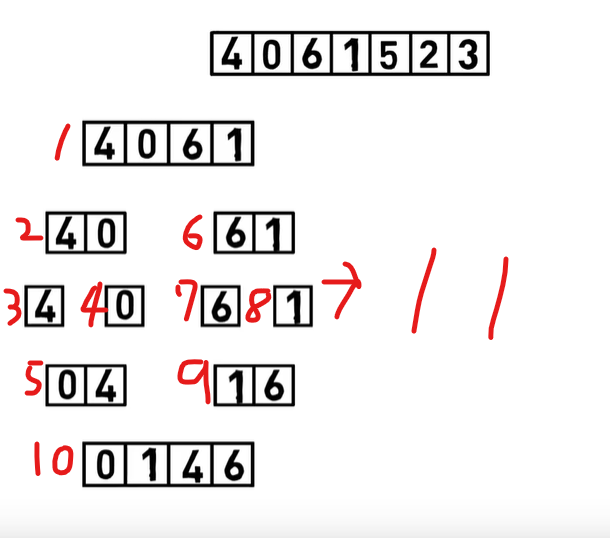

In [89]:
def merge_sort(input):
    # 折返限制
    if len(input) > 1:
        # 切分
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]
        
        # 準備左邊的 array
        merge_sort(subarray_left)
        
        # 準備右邊的 array
        merge_sort(subarray_right)
        
        # 比較排序
        l_idx,r_idx = 0,len(subarray_left) #左邊的長度就會是右邊的頭
        output_array = subarray_left+subarray_right
        border =len(output_array)

先準備好需要的變數:

- **l_idx & r_idx:** 分別為左、右 array 的比較標記，初始為各自的頭
- **output_array:** 我這邊就直接將兩個 array 何在一起，也就等於要輸出的 array，左右則分別以兩個 index 做標記。
- **border:** 但是感覺要用 in-place 的方式需要交換，需要隔板，於是我加入了 border。我的想法是把 border 放在整個 array 的後面，每次比較排序時將其往前推，在分別調整 r_idx 和 l_idx 的位置，當 border=0 時代表兩邊的 array 已經比較完了。

#### > 測試一下變數這樣設有沒有問題

In [111]:
a=[1,5,2]
b=[8,4]
print(a+b) # 直接相加

[1, 5, 2, 8, 4]


In [113]:
r_idx=len(a)
print((a+b)[r_idx]) # 右 array 的頭

8


In [110]:
border=len(a+b)
print((a+b)[border-1]) # border 往前移

4


看來沒甚麼問題~

---

### >> 接著就剩下比較與移動index 的條件邏輯了..

在比較時我想把`較小的值`抽出來，並將它之後的 array全部向前推，再把`較小的值`放到最後， border 往前移動，值到 border = 0。

In [ ]:
def merge_sort(input):
    # 折返限制
    if len(input) > 1:
        # 切分
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]
        
        # 準備左邊的 array
        merge_sort(subarray_left)
        
        # 準備右邊的 array
        merge_sort(subarray_right)
        
        # 比較排序的變數
        l_idx,r_idx = 0,len(subarray_left) 
        output_array = subarray_left+subarray_right
        border =len(output_array)
        
        # 比較與排序
        while border > 0:
            if output_array[l_idx]<=output_array[r_idx]:
                smaller = output_array[l_idx]
                output_array = output_array[:l_idx]+output_array[l_idx+1:]
                output_array.append(smaller)
                border-=1
                r_idx-=1
            else:
                smaller = output_array[r_idx]
                output_array = output_array[:r_idx]+output_array[r_idx+1:]
                output_array.append(smaller)
                border-=1
                

#### > 測試一下

In [189]:
# 測試用
a=[1,5,10,12]
b=[2,4,8]
output_array = a+b
l_idx,r_idx = 0,len(a) 
border =len(output_array)

In [190]:
        while border>0:
            print(output_array[l_idx:r_idx],output_array[r_idx:border],output_array[border:])
            if output_array[l_idx]<=output_array[r_idx]:
                print('>> 左小')
                smaller = output_array[l_idx]
                output_array = output_array[:l_idx]+output_array[l_idx+1:]
                output_array.append(smaller)
                border-=1
                r_idx-=1               
            else:
                print('>> 右小')
                smaller = output_array[r_idx]
                output_array = output_array[:r_idx]+output_array[r_idx+1:]
                output_array.append(smaller)
                border-=1
        print(output_array)

[1, 5, 10, 12] [2, 4, 8] []
>> 左小
[5, 10, 12] [2, 4, 8] [1]
>> 右小
[5, 10, 12] [4, 8] [1, 2]
>> 右小
[5, 10, 12] [8] [1, 2, 4]
>> 左小
[10, 12] [8] [1, 2, 4, 5]
>> 右小
[10, 12] [] [1, 2, 4, 5, 8]
>> 右小
[10, 12] [] [12, 2, 4, 5, 8, 1]
>> 右小
[10, 12, 4, 5, 8, 1, 2]


前面很順利，但是當一邊的 array 已經空時，它就抓錯 element...

---

# Try again
#### > 看來，我需要多加一個條件，就是當只剩下一個 array 時直接把剩下的 array 加到後面。

In [195]:
# 測試用
a=[1,5,10,12]
b=[2,4,8]
output_array = a+b
l_idx,r_idx = 0,len(a) 
border =len(output_array)

In [196]:
        while border>0:
            print(output_array[l_idx:r_idx],output_array[r_idx:border],output_array[border:])
            if l_idx==r_idx or r_idx==border:
                print('>> 剩一 array')
                remain = output_array[:border]
                output_array = output_array[border:]
                output_array.extend(remain)
                border=0
            elif output_array[l_idx]<=output_array[r_idx]:
                print('>> 左小')
                smaller = output_array[l_idx]
                output_array = output_array[:l_idx]+output_array[l_idx+1:]
                output_array.append(smaller)
                border-=1
                r_idx-=1               
            else:
                print('>> 右小')
                smaller = output_array[r_idx]
                output_array = output_array[:r_idx]+output_array[r_idx+1:]
                output_array.append(smaller)
                border-=1
        print(output_array)

[1, 5, 10, 12] [2, 4, 8] []
>> 左小
[5, 10, 12] [2, 4, 8] [1]
>> 右小
[5, 10, 12] [4, 8] [1, 2]
>> 右小
[5, 10, 12] [8] [1, 2, 4]
>> 左小
[10, 12] [8] [1, 2, 4, 5]
>> 右小
[10, 12] [] [1, 2, 4, 5, 8]
>> 剩一 array
[1, 2, 4, 5, 8, 10, 12]


看來蠻順利的~

---
### >> 但是合在一起又有問題了...

In [201]:
def merge_sort(input):
    # 折返限制
    if len(input) > 1:
        # 切分
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]
        
        # 準備左邊的 array
        merge_sort(subarray_left)
        
        # 準備右邊的 array
        merge_sort(subarray_right)
        
        # 比較排序的變數
        l_idx,r_idx = 0,len(subarray_left) 
        output_array = subarray_left+subarray_right
        border =len(output_array)
        
        # 比較與排序
        while border>0:
            if l_idx==r_idx or r_idx==border:
                remain = output_array[:border]
                output_array = output_array[border:]
                output_array.extend(remain)
                border=0
            elif output_array[l_idx]<=output_array[r_idx]:
                smaller = output_array[l_idx]
                output_array = output_array[:l_idx]+output_array[l_idx+1:]
                output_array.append(smaller)
                border-=1
                r_idx-=1               
            else:
                smaller = output_array[r_idx]
                output_array = output_array[:r_idx]+output_array[r_idx+1:]
                output_array.append(smaller)
                border-=1
        return output_array

In [202]:
# 測試用
a=[1,5,10,12,2,4,8]
b=merge_sort(a)
print(b)

TypeError: object of type 'NoneType' has no len()

---

# Try again and again

### >>於是我打算將比較的部分抽離成獨立的 function

In [221]:
def compare(subarray_left,subarray_right):
    # 比較排序的變數
    l_idx,r_idx = 0,len(subarray_left) 
    output_array = subarray_left+subarray_right
    border =len(output_array)
        
    # 比較與排序
    while border>0:
        if l_idx==r_idx or r_idx==border:
            remain = output_array[:border]
            output_array = output_array[border:]
            output_array.extend(remain)
            border=0
        elif output_array[l_idx]<=output_array[r_idx]:
            smaller = output_array[l_idx]
            output_array = output_array[:l_idx]+output_array[l_idx+1:]
            output_array.append(smaller)
            border-=1
            r_idx-=1               
        else:
            smaller = output_array[r_idx]
            output_array = output_array[:r_idx]+output_array[r_idx+1:]
            output_array.append(smaller)
            border-=1
    return output_array

def merge_sort(input):
    # 折返限制
    if len(input) > 1:
        # 切分
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]
        
        # 準備左邊的 array
        merge_sort(subarray_left)
        
        # 準備右邊的 array
        merge_sort(subarray_right)
        
        #比較
        print('input:',subarray_left,subarray_right)
        print('output:',compare(subarray_left,subarray_right),'\n')
        return compare(subarray_left,subarray_right)


In [222]:
a=[1,5,10,12,2,4,8]
b=merge_sort(a)
print(b)

input: [5] [10]
output: [5, 10] 

input: [1] [5, 10]
output: [1, 5, 10] 

input: [12] [2]
output: [2, 12] 

input: [4] [8]
output: [4, 8] 

input: [12, 2] [4, 8]
output: [4, 8, 12, 2] 

input: [1, 5, 10] [12, 2, 4, 8]
output: [1, 5, 10, 12, 2, 4, 8] 

[1, 5, 10, 12, 2, 4, 8]


---
### >> 看來我的 compare 是沒問題的只是 merge sort 流程的問題，我改了一下...

In [223]:
def compare(subarray_left,subarray_right):
    # 比較排序的變數
    l_idx,r_idx = 0,len(subarray_left) 
    output_array = subarray_left+subarray_right
    border =len(output_array)
        
    # 比較與排序
    while border>0:
        if l_idx==r_idx or r_idx==border:
            remain = output_array[:border]
            output_array = output_array[border:]
            output_array.extend(remain)
            border=0
        elif output_array[l_idx]<=output_array[r_idx]:
            smaller = output_array[l_idx]
            output_array = output_array[:l_idx]+output_array[l_idx+1:]
            output_array.append(smaller)
            border-=1
            r_idx-=1               
        else:
            smaller = output_array[r_idx]
            output_array = output_array[:r_idx]+output_array[r_idx+1:]
            output_array.append(smaller)
            border-=1
    return output_array

def merge_sort(input):
    # 折返限制
    if len(input) > 1:
        # 切分
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]
        
        # 準備左邊的 array
        subarray_left = merge_sort(subarray_left)
        
        # 準備右邊的 array
        subarray_right = merge_sort(subarray_right)
        
        #比較
        print('input:',subarray_left,subarray_right)
        print('output:',compare(subarray_left,subarray_right),'\n')
        return compare(subarray_left,subarray_right)


In [226]:
a=[1,5,10,12,2,4,8]
b=merge_sort(a)
print(b)

input: None None


TypeError: object of type 'NoneType' has no len()

看起來不太妙... 但是我不會放棄的!!!

---
# Keep trying


In [237]:
def compare(subarray_left,subarray_right):
    # 比較排序的變數
    l_idx,r_idx = 0,len(subarray_left) 
    output_array = subarray_left+subarray_right
    border =len(output_array)
        
    # 比較與排序
    while border>1:
        if l_idx==r_idx or r_idx==border:
            remain = output_array[:border]
            output_array = output_array[border:]
            output_array.extend(remain)
            border=0
        elif output_array[l_idx]<=output_array[r_idx]:
            smaller = output_array[l_idx]
            output_array = output_array[:l_idx]+output_array[l_idx+1:]
            output_array.append(smaller)
            border-=1
            r_idx-=1               
        else:
            smaller = output_array[r_idx]
            output_array = output_array[:r_idx]+output_array[r_idx+1:]
            output_array.append(smaller)
            border-=1
    return output_array

def merge_sort(input):
    # 折返限制
    if len(input) > 1:
        # 切分
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]
        
        # 準備左邊的 array
        subarray_left = merge_sort(subarray_left)
        
        # 準備右邊的 array
        subarray_right = merge_sort(subarray_right)
        
        if subarray_left!=None and subarray_right!= None:
            #比較
            print('input:',subarray_left,subarray_right)
            print('output:',compare(subarray_left,subarray_right),'\n')
            return compare(subarray_left,subarray_right)
        else:
            return input


In [238]:
a=[1,5,10,12,2,4,8]
b=merge_sort(a)
print(b)

input: [12, 2] [4, 8]
output: [4, 8, 12, 2] 

input: [1, 5, 10] [4, 8, 12, 2]
output: [1, 4, 5, 8, 10, 12, 2] 

[1, 4, 5, 8, 10, 12, 2]


哇! 2 怎麼跑到後面了...

---
### >>我發現是因為在 len(array=1) 時沒有返回東西，所以直接比較未排序的 array。

In [3]:
def compare(subarray_left,subarray_right):
    # 比較排序的變數
    l_idx,r_idx = 0,len(subarray_left) 
    output_array = subarray_left+subarray_right
    border =len(output_array)
        
    # 比較與排序
    while border>1:
        if l_idx==r_idx or r_idx==border:
            remain = output_array[:border]
            output_array = output_array[border:]
            output_array.extend(remain)
            border=0
        elif output_array[l_idx]<=output_array[r_idx]:
            smaller = output_array[l_idx]
            output_array = output_array[:l_idx]+output_array[l_idx+1:]
            output_array.append(smaller)
            border-=1
            r_idx-=1               
        else:
            smaller = output_array[r_idx]
            output_array = output_array[:r_idx]+output_array[r_idx+1:]
            output_array.append(smaller)
            border-=1
    return output_array

def merge_sort(input):
    # 折返限制
    if len(input) > 1:
        # 切分
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]
        
        # 準備左邊的 array
        subarray_left = merge_sort(subarray_left)
        
        # 準備右邊的 array
        subarray_right = merge_sort(subarray_right)
        
        if subarray_left!=None and subarray_right!= None:
            #比較
            print('input:',subarray_left,subarray_right)
            print('output:',compare(subarray_left,subarray_right),'\n')
            return compare(subarray_left,subarray_right)
        else:
            return input
    elif len(input)==1:
        return input


In [4]:
a=[1,5,10,12,2,4,8]
b=merge_sort(a)
print(b)

input: [5] [10]
output: [10, 5] 

input: [1] [10, 5]
output: [1, 10, 5] 

input: [12] [2]
output: [12, 2] 

input: [4] [8]
output: [8, 4] 

input: [12, 2] [8, 4]
output: [8, 4, 12, 2] 

input: [1, 10, 5] [8, 4, 12, 2]
output: [1, 8, 4, 10, 5, 12, 2] 

[1, 8, 4, 10, 5, 12, 2]


---
### >> 這邊很明顯我的 compare 在處理兩個只有一個element 的 array 有問題...

In [7]:
def compare(subarray_left,subarray_right):
    # 比較排序的變數
    l_idx,r_idx = 0,len(subarray_left) 
    output_array = subarray_left+subarray_right
    border =len(output_array)
        
    # 比較與排序
    while border>0:
        if l_idx==r_idx or r_idx==border:
            remain = output_array[:border]
            output_array = output_array[border:]
            output_array.extend(remain)
            border=0
        elif output_array[l_idx]<=output_array[r_idx]:
            smaller = output_array[l_idx]
            output_array = output_array[:l_idx]+output_array[l_idx+1:]
            output_array.append(smaller)
            border-=1
            r_idx-=1               
        else:
            smaller = output_array[r_idx]
            output_array = output_array[:r_idx]+output_array[r_idx+1:]
            output_array.append(smaller)
            border-=1
    return output_array

def merge_sort(input):
    # 折返限制
    if len(input) > 1:
        # 切分
        div = len(input)//2
        subarray_left = input[:div]
        subarray_right = input[div:]
        
        # 準備左邊的 array
        subarray_left = merge_sort(subarray_left)
        
        # 準備右邊的 array
        subarray_right = merge_sort(subarray_right)
        
        if subarray_left!=None and subarray_right!= None:
            #比較
            print('input:',subarray_left,subarray_right)
            print('output:',compare(subarray_left,subarray_right),'\n')
            return compare(subarray_left,subarray_right)
        else:
            return input
    elif len(input)==1:
        return input


In [8]:
compare([2],[1])

[1, 2]

In [9]:
a=[1,5,10,12,2,4,8]
b=merge_sort(a)
print(b)

input: [5] [10]
output: [5, 10] 

input: [1] [5, 10]
output: [1, 5, 10] 

input: [12] [2]
output: [2, 12] 

input: [4] [8]
output: [4, 8] 

input: [2, 12] [4, 8]
output: [2, 4, 8, 12] 

input: [1, 5, 10] [2, 4, 8, 12]
output: [1, 2, 4, 5, 8, 10, 12] 

[1, 2, 4, 5, 8, 10, 12]


終於成功了!!! 太高興了~

結果是compare 的 border 設錯了，我原本是 border >1 ，但是這樣的話會排除 array 長度等於1 的情況，所以我改成 border >0。

---
#  寫成 class

In [3]:
class Solution(object):
    def compare(self,subarray_left,subarray_right):
        # 比較排序的變數
        l_idx,r_idx = 0,len(subarray_left) 
        output_array = subarray_left+subarray_right
        border =len(output_array)

        # 比較與排序
        while border>0:
            if l_idx==r_idx or r_idx==border:
                remain = output_array[:border]
                output_array = output_array[border:]
                output_array.extend(remain)
                border=0
            elif output_array[l_idx]<=output_array[r_idx]:
                smaller = output_array[l_idx]
                output_array = output_array[:l_idx]+output_array[l_idx+1:]
                output_array.append(smaller)
                border-=1
                r_idx-=1               
            else:
                smaller = output_array[r_idx]
                output_array = output_array[:r_idx]+output_array[r_idx+1:]
                output_array.append(smaller)
                border-=1
        return output_array

    def merge_sort(self,input):
        # 折返限制
        if len(input) > 1:
            # 切分
            div = len(input)//2
            subarray_left = input[:div]
            subarray_right = input[div:]

            # 準備左邊的 array
            subarray_left = self.merge_sort(subarray_left)

            # 準備右邊的 array
            subarray_right = self.merge_sort(subarray_right)
            
            # 兩個array 都準備好則開始比較
            if subarray_left!=None and subarray_right!= None:
                return self.compare(subarray_left,subarray_right)
            else:
                return input
        elif len(input)==1:
            return input


# 整理一下，刪除不必要的條件

In [2]:
class Solution(object):
    def compare(self,subarray_left,subarray_right):
        # 變數
        l_idx,r_idx = 0,len(subarray_left) 
        output_array = subarray_left+subarray_right
        border =len(output_array)

        # 比較與排序
        while border>0:
            if l_idx==r_idx or r_idx==border:
                remain = output_array[:border]
                output_array = output_array[border:]
                output_array.extend(remain)
                border=0
            elif output_array[l_idx]<=output_array[r_idx]:
                smaller = output_array[l_idx]
                output_array = output_array[:l_idx]+output_array[l_idx+1:]
                output_array.append(smaller)
                border-=1
                r_idx-=1               
            else:
                smaller = output_array[r_idx]
                output_array = output_array[:r_idx]+output_array[r_idx+1:]
                output_array.append(smaller)
                border-=1
        return output_array

    def merge_sort(self,input):
        # 折返限制
        if len(input) > 1:
            # 切分
            div = len(input)//2
            subarray_left = input[:div]
            subarray_right = input[div:]
            
            # 準備左邊的 array
            subarray_left = self.merge_sort(subarray_left)
            
            # 準備右邊的 array
            subarray_right = self.merge_sort(subarray_right)
            
            # 兩個array 都準備好則開始比較
            return self.compare(subarray_left,subarray_right)
        elif len(input)==1:
            return input



Test
---

In [5]:
import random

for _ in range(10):
    l = random.randint(2,30)
    array = [random.randint(-50,100) for _ in range(l)]
    print('input:',array)
    out=Solution().merge_sort(array)
    print('sorted:',out,'\n')
        

input: [-8, -7, 9, 61, -14, 53, 71, -27, 9, 9, 25, 22, 3, -24]
sorted: [-27, -24, -14, -8, -7, 3, 9, 9, 9, 22, 25, 53, 61, 71] 

input: [-26, 19, 70, 31, -6, -48, 13]
sorted: [-48, -26, -6, 13, 19, 31, 70] 

input: [-43, 16, 47, 75, 12, 76, 73, -1, -7, -14, 16, 18, -19, 67, 1, -27, 27, -35, 6, 18, 1, 70, 42, 23, 34, -1, 20, 2, -9]
sorted: [-43, -35, -27, -19, -14, -9, -7, -1, -1, 1, 1, 2, 6, 12, 16, 16, 18, 18, 20, 23, 27, 34, 42, 47, 67, 70, 73, 75, 76] 

input: [90, -47, 89, -18]
sorted: [-47, -18, 89, 90] 

input: [20, 60, 25, 71, 75, 79, -1, 88, 98, 12, 79, -5, 25, -37, 22, 63, 35, 36, -5, 86, -21, -32, 84, 58, 51, -42, -8, -16, -7]
sorted: [-42, -37, -32, -21, -16, -8, -7, -5, -5, -1, 12, 20, 22, 25, 25, 35, 36, 51, 58, 60, 63, 71, 75, 79, 79, 84, 86, 88, 98] 

input: [61, 0, -46, 89, -18, 64, 2, -11]
sorted: [-46, -18, -11, 0, 2, 61, 64, 89] 

input: [-46, -18, 74, -24, 86, 41, 99, 66]
sorted: [-46, -24, -18, 41, 66, 74, 86, 99] 

input: [28, 19, 87, 66, 82, -37, -7, 24, 31, 13, 

### >> 看起來恨順利呢~